# List of Contents

### 01 Importing libraries and data Q1

### 02 PII issues Q2

### 03 Regional Segmentation Q3

##### 3.1 Creating 'region' column
##### 3.2 Determining spending habits between regions
    
### 04 Low Activity Customer Exclusion Q4

### 05 Customer Profiling Q5

##### 5.1 Chech distributions/counts of consumer variables
##### 5.2 Creating Income Flag
##### 5.3 Creating Customer Profiles
##### 5.4 Creating Income Subgroups
    
### 06 Profile Distributions Q6

### 07 Aggregations Q7

### 08 Consumer Profiles by Regions and Departments Q8

### 09 Additional info and charts

### 10 Exporting Q9

# Importing libraries and data Q1

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assign a path
path = r'/Users/dramblys/Desktop/Achievement 4/Instacart Basket Analysis'

In [3]:
# Import data
ords_prods_custmrs=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_consumers.pkl'))

In [6]:
# Import data
active_users=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_users.pkl'))

# PII issues Q2

The dataset includes first and last names, which is considered PII. Since customer data for our exercise was fabricated, there is no need to remove/avoid it in the analysis. Age, state, marital status or income is not enough to identify an individual (in most cases. unless someone has 10+ children, etc), and is considered "unlincable data".

# Regional Segmentation Q3

In [4]:
# Check 
ords_prods_custmrs.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


### 3.1 Creating 'region' column

In [5]:
# Assign states for Region 1: Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, Pennsylvania, New Jersey
ords_prods_custmrs.loc[ords_prods_custmrs['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']),'region'] = 1

In [6]:
# Assign states for Region 2: Wisconsin, Michigan, Illinois, Indiana, Ohio, North Dakota, South Dakota, Nebraska, Kansas, Minnesota, Iowa, Missouri
ords_prods_custmrs.loc[ords_prods_custmrs['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']),'region'] = 2

In [7]:
# Assign states for Region 3: Delaware, Maryland, District of Columbia, Virginia, West Virginia, North Carolina, South Carolina, Georgia, Florida, Kentucky, Tennessee, Mississippi, Alabama, Oklahoma, Texas, Arkansas, Louisiana
ords_prods_custmrs.loc[ords_prods_custmrs['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']),'region'] = 3

In [8]:
# Assign states for Region 4: Idaho, Montana, Wyoming, Nevada, Utah, Colorado, Arizona, New Mexico, Alaska, Washington, Oregon, California, Hawaii
ords_prods_custmrs.loc[ords_prods_custmrs['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']),'region'] = 4

In [9]:
# Check Region counts
ords_prods_custmrs['region'].value_counts(dropna = False)

3.0    10791885
4.0     8292913
2.0     7597325
1.0     5722736
Name: region, dtype: int64

In [10]:
# Check for missing
ords_prods_custmrs[ords_prods_custmrs['region'].isnull()]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income,region


### 3.2 Determining spending habits between regions

In [11]:
# Region/spending crosstab
region_spending = pd.crosstab(ords_prods_custmrs['region'], ords_prods_custmrs['spending_flag'],dropna = False)

In [12]:
region_spending

spending_flag,High spender,Low spender
region,,
1.0,18642,5704094
2.0,29265,7568060
3.0,40579,10751306
4.0,31242,8261671


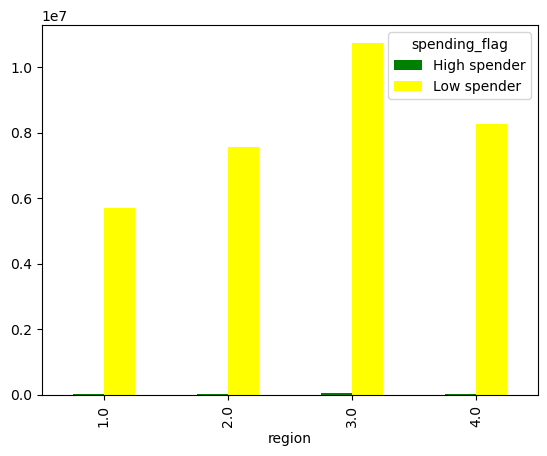

In [13]:
# Create bar graph for regional spending flag distribution
bar_region_spending = region_spending.plot.bar(color = ['green', 'yellow'])

# 04 Low Activity Customer Exclusion Q4

In [14]:
# Create low activity flag
ords_prods_custmrs.loc[ords_prods_custmrs['max_order'] <5, 'activity_flag'] = 'Low activity'

In [15]:
ords_prods_custmrs.loc[ords_prods_custmrs['max_order'] >=5, 'activity_flag'] = 'Normal activity'

In [16]:
# Check 
ords_prods_custmrs['activity_flag'].value_counts(dropna = False)

Normal activity    30964564
Low activity        1440295
Name: activity_flag, dtype: int64

In [17]:
# Subset without Low activity customers
active_users = ords_prods_custmrs[ords_prods_custmrs['activity_flag'] == 'Normal activity']

In [18]:
# Check shape
active_users.shape

(30964564, 35)

# 05 Customer Profiling Q5

### 5.1 Chech distributions/counts of consumer variables

In [19]:
# Check stats
active_users[['age', 'income', 'num_of_dependants']].describe()

,age,income,num_of_dependants
count,3.096456e+07,3.096456e+07,3.096456e+07
mean,4.946803e+01,9.967587e+04,1.501819e+00
std,1.848528e+01,4.314187e+04,1.118896e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.729200e+04,1.000000e+00
50%,4.900000e+01,9.676500e+04,2.000000e+00
75%,6.500000e+01,1.281020e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


In [20]:
active_users['age'].value_counts()

79    508337
49    507879
48    506730
31    506218
64    504832
       ...  
60    461897
36    460649
66    454604
41    451269
25    449324
Name: age, Length: 64, dtype: int64

Very similar number of orders for each age group.

In [21]:
active_users['num_of_dependants'].value_counts()

3    7772516
0    7739681
2    7733261
1    7719106
Name: num_of_dependants, dtype: int64

Very similar number of orders for each number of dependents group. 

In [22]:
active_users['fam_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

Very unequal number of orders (and customers) for each group.

In [23]:
# Create crosstab between family status and # of dependents
fam_dependents = pd.crosstab(active_users['fam_status'], active_users['num_of_dependants'],dropna = False)

In [24]:
fam_dependents

num_of_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


### 5.2 Creating Income Flag 

In [25]:
# Create income flag
active_users.loc[active_users['income'] <50000, 'income_flag'] = 'Low earners'

/var/folders/vk/7j6xs_wx4g377fxvjj1tbnxr0000gn/T/ipykernel_69402/1208534522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_users.loc[active_users['income'] <50000, 'income_flag'] = 'Low earners'


In [26]:
active_users.loc[(active_users['income'] >= 50000) & (active_users['income'] < 150000), 'income_flag'] = 'Middle class'

In [27]:
active_users.loc[active_users['income'] >=150000, 'income_flag'] = 'Upper class'

In [28]:
active_users['income_flag'].value_counts(dropna = False)

Middle class    23706735
Upper class      3895275
Low earners      3362554
Name: income_flag, dtype: int64

### 5.3 Creating Customer Profiles

In [29]:
active_users.loc[(active_users['num_of_dependants'] >= 1) & (active_users['age'] <= 60) & (active_users['fam_status'] == "married"), 'profile'] = 'Married with dependents'

/var/folders/vk/7j6xs_wx4g377fxvjj1tbnxr0000gn/T/ipykernel_69402/313910953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_users.loc[(active_users['num_of_dependants'] >= 1) & (active_users['age'] <= 60) & (active_users['fam_status'] == "married"), 'profile'] = 'Married with dependents'


In [30]:
active_users.loc[(active_users['num_of_dependants'] >= 1) & (active_users['age'] > 60), 'profile'] = 'Senior with dependents'

In [31]:
active_users.loc[(active_users['num_of_dependants'] == 0) & (active_users['age'] <= 60), 'profile'] = 'Single adult'

In [32]:
active_users.loc[(active_users['num_of_dependants'] == 0) & (active_users['age'] > 60), 'profile'] = 'Senior no dependents'

In [33]:
active_users.loc[(active_users['num_of_dependants'] >= 1) & (active_users['age'] <= 60) & (active_users['fam_status'] == "living with parents and siblings"), 'profile'] = 'Unmarried with dependents'

In [34]:
active_users['profile'].value_counts(dropna = False)

Married with dependents      14164205
Senior with dependents        7579506
Single adult                  5206580
Senior no dependents          2533101
Unmarried with dependents     1481172
Name: profile, dtype: int64

In [35]:
# Crossstab profile/income_flag
profile_income = pd.crosstab(active_users['profile'], active_users['income_flag'],dropna = False)

In [36]:
profile_income

income_flag,Low earners,Middle class,Upper class
profile,,,
Married with dependents,1666765,11039673,1457767
Senior no dependents,203163,1837936,492002
Senior with dependents,628327,5525648,1425531
Single adult,643757,4057818,505005
Unmarried with dependents,220542,1245660,14970


### 5.4 Creating Income Subgroups

In [7]:
# Create low_earners subgroup
low_earners = active_users.loc[active_users['income_flag'] == "Low earners"]

In [8]:
low_earners['income_flag'].value_counts(dropna = False)

Low earners    3362554
Name: income_flag, dtype: int64

In [9]:
# Create middle_class subgroup
middle_class = active_users.loc[active_users['income_flag'] == "Middle class"]

In [10]:
middle_class['income_flag'].value_counts(dropna = False)

Middle class    23706735
Name: income_flag, dtype: int64

In [11]:
# Create upper_class subgroup
upper_class = active_users.loc[active_users['income_flag'] == "Upper class"]

In [12]:
upper_class['income_flag'].value_counts(dropna = False)

Upper class    3895275
Name: income_flag, dtype: int64

# 06 Profile Distributions Q6

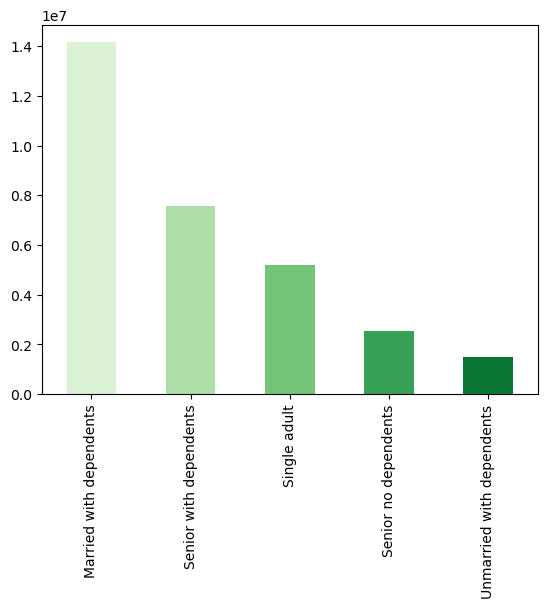

In [13]:
# Profile bar
profile_bar = active_users['profile'].value_counts().plot.bar(color = sns.color_palette('Greens', 5))

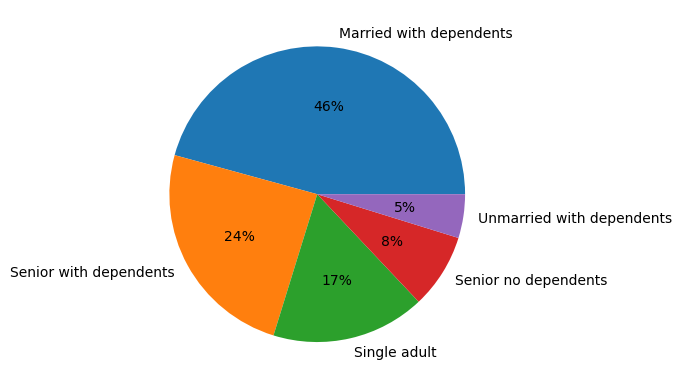

In [15]:
# Profile pie
profile_pie = active_users['profile'].value_counts().plot.pie(label = '', autopct=('%1.f%%'))

In [17]:
# Crossstab profile/income 
profile_income = pd.crosstab(active_users['profile'], active_users['income_flag'],dropna = False)

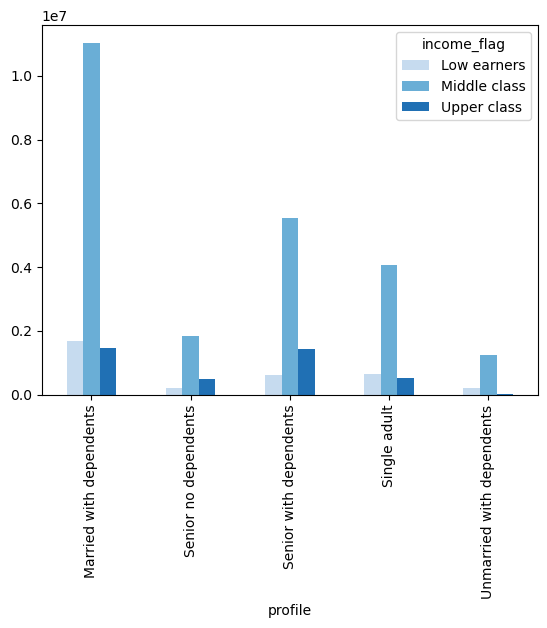

In [18]:
# Profile/income bar
profile_income_bar = profile_income.plot.bar(color = sns.color_palette('Blues', 3))

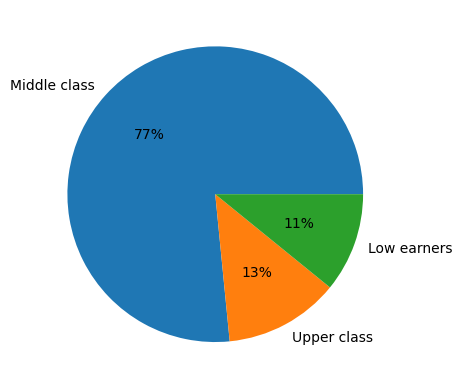

In [20]:
# Earnings pie
earning_pie = active_users['income_flag'].value_counts().plot.pie(label = '', autopct=('%1.f%%'))

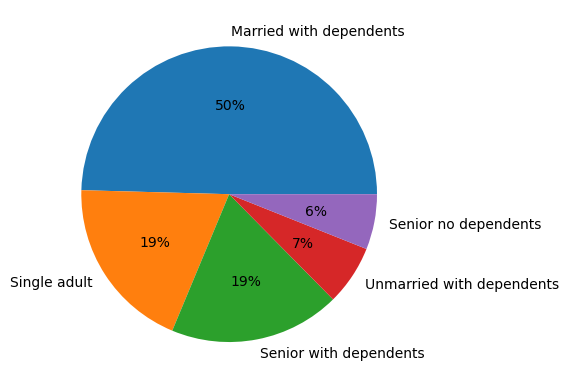

In [22]:
# Profile pie for low earners 
profile_pie_low = low_earners['profile'].value_counts().plot.pie(label = '', autopct=('%1.f%%'))

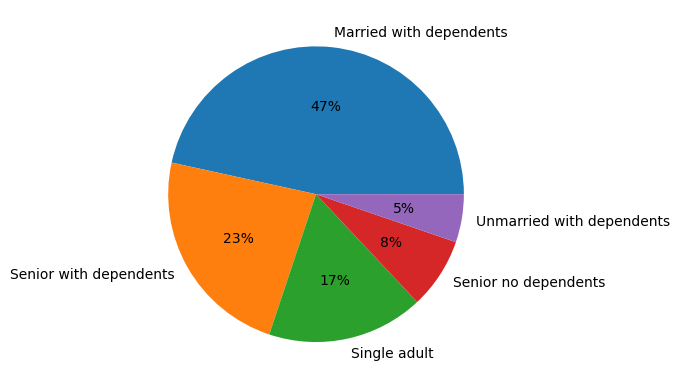

In [23]:
# Profile pie for middle income
profile_pie_middle = middle_class['profile'].value_counts().plot.pie(label = '', autopct=('%1.f%%'))

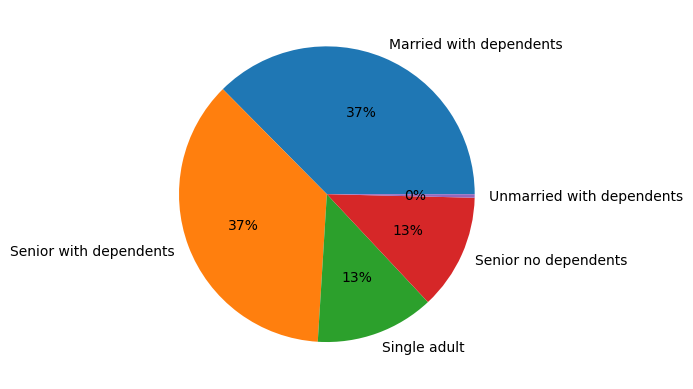

In [24]:
# Profile pie for upper income
profile_pie_upper = upper_class['profile'].value_counts().plot.pie(label = '', autopct=('%1.f%%'))

It makes sence that overall distribution of profiles looks closest to middle_class earners (making $50-150k), as it is by far the lasgest group. Profile distribution among low earners is still relatively close to that of middle class and overall (percentage of seniors is lower, compared to other income levels and overall population, and percentage of unmarried with dependants is higher in this group). Upper class profile distribution differs most from the other two: seniors (both with and without dependents) make up a larger piece (half of all upper class customers are seniors, compared to only a quarter of low income pie), while all the other profile groups are smaller (almost no unmarried with dependents).
I also cheched profile distribution for each reagion separately, and it is almost the same across regions.

# 07 Aggregations Q7

In [25]:
# Aggregate expenditure min, max, mean on profile level
active_users.groupby('profile').agg({'prices' : ['mean', 'max', 'min', 'sum']})

prices                        
                               mean   max  min          sum
profile                                                    
Married with dependents    7.787682  25.0  1.0  110288074.4
Senior no dependents       7.799175  25.0  1.0   19752706.6
Senior with dependents     7.795131  25.0  1.0   59074137.4
Single adult               7.784867  25.0  1.0   40526786.1
Unmarried with dependents  7.800604  25.0  1.0   11552531.1

In [26]:
# Aggregate usage frequency min, max, mean on profile level
active_users.groupby('profile').agg({'days_since_prior_order' : ['mean', 'max', 'min']})

days_since_prior_order           
                                            mean   max  min
profile                                                    
Married with dependents                10.827289  30.0  0.0
Senior no dependents                   10.741025  30.0  0.0
Senior with dependents                 10.808885  30.0  0.0
Single adult                           10.816736  30.0  0.0
Unmarried with dependents              10.750995  30.0  0.0

All profile groups are relatively similar on average, both for average price paid as well as order frequency. Total spent (sum) matches the number of customers in each profile (married with dependents spent most and is the largest profile group). I also checked this for each region separately and for each income level - no significant differences anywhere.

# 08 Consumer Profiles by Regions and Departments Q8

In [27]:
# Crossstab profile/region
profile_region = pd.crosstab(active_users['profile'], active_users['region'],dropna = False)

In [28]:
profile_region

region,1.0,2.0,3.0,4.0
profile,,,,
Married with dependents,2504950,3325370,4700774,3633111
Senior no dependents,460190,594878,838254,639779
Senior with dependents,1348823,1761892,2522975,1945816
Single adult,894292,1227938,1743679,1340671
Unmarried with dependents,256430,351435,505457,367850


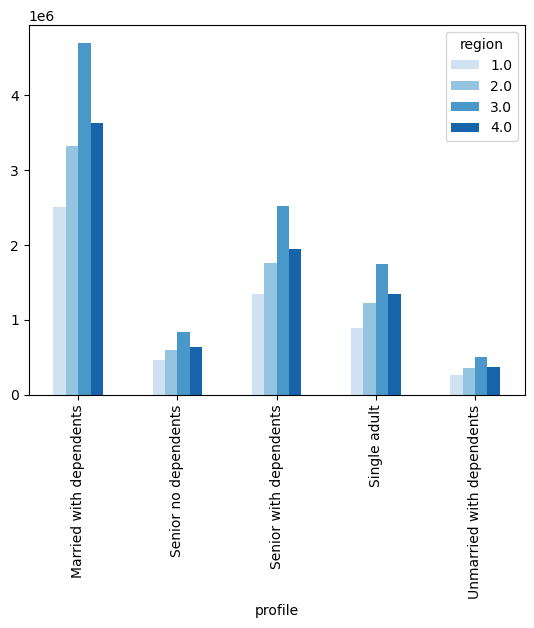

In [29]:
bar_profile_region = profile_region.plot.bar(color = sns.color_palette('Blues', 4))

In [30]:
# Crossstab region/departments
departments_region = pd.crosstab(active_users['department_id'], active_users['region'],dropna = False)

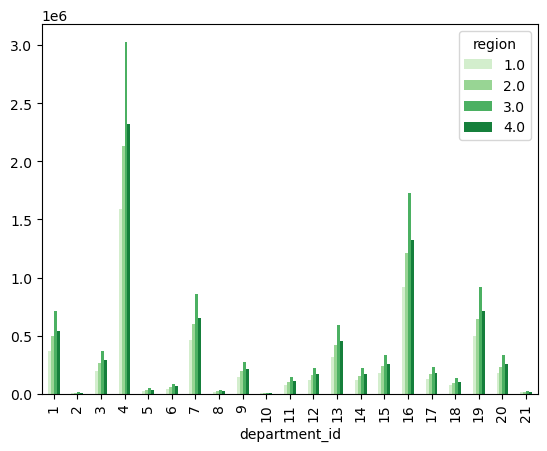

In [31]:
department_region_bar = departments_region.plot.bar(color = sns.color_palette('Greens', 4))

In [32]:
# Crossstab department/profile 
department_profile_low = pd.crosstab(low_earners['department_id'], low_earners['profile'],dropna = False)

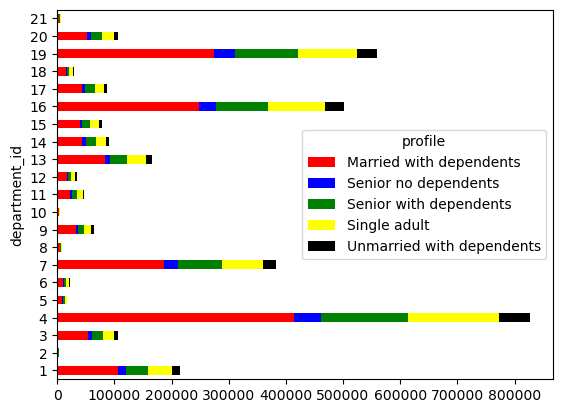

In [33]:
bar_department_profile_low = department_profile_low.plot.barh(stacked = True, color = ('Red', 'Blue', 'Green', 'Yellow', 'Black'))

In [34]:
# Crossstab department/profile 
department_profile_middle = pd.crosstab(middle_class['department_id'], middle_class['profile'],dropna = False)

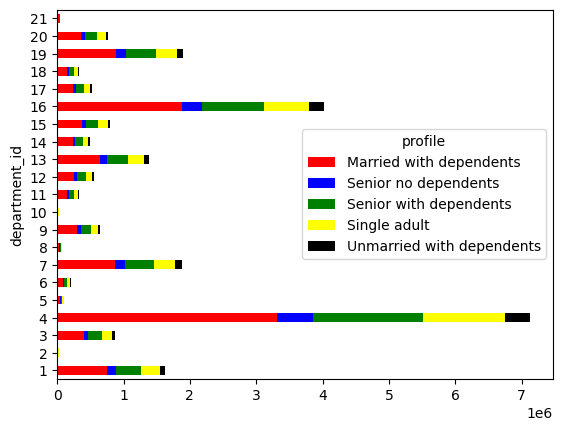

In [35]:
bar_department_profile_middle = department_profile_middle.plot.barh(stacked = True, color = ('Red', 'Blue', 'Green', 'Yellow', 'Black'))

In [36]:
# Crossstab department/profile 
department_profile_upper = pd.crosstab(upper_class['department_id'], upper_class['profile'],dropna = False)

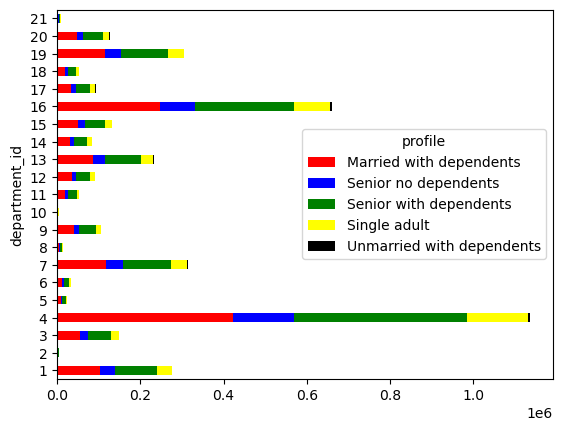

In [37]:
bar_department_profile_upper = department_profile_upper.plot.barh(stacked = True, color = ('Red', 'Blue', 'Green', 'Yellow', 'Black'))

# 09 Additional info and graphs

In [56]:
# Aggregate expenditure min, max, mean on loyalty level
active_users.groupby('loyalty_flag').agg({'prices' : ['mean', 'max', 'min', 'sum']})

prices                        
                      mean   max  min          sum
loyalty_flag                                      
Loyal customer    7.773575  25.0  1.0   79933825.2
New customer      7.801665  25.0  1.0   37469804.2
Regular customer  7.798262  25.0  1.0  123790606.2

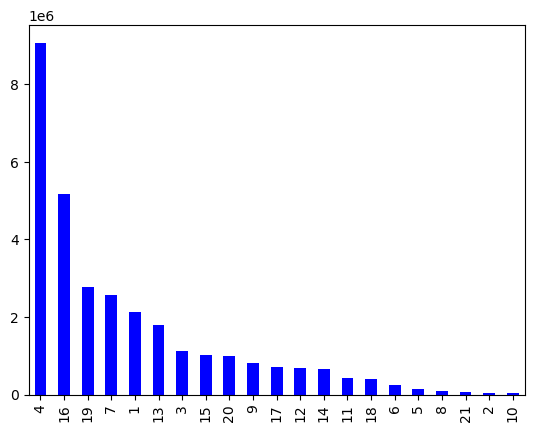

In [57]:
# Create Bar Chart for departments
bar_department_id = active_users['department_id'].value_counts().plot.bar(color =['blue'],)

In [58]:
# Create produce (4) subgroup
Produce = active_users.loc[active_users['department_id'] == 4]

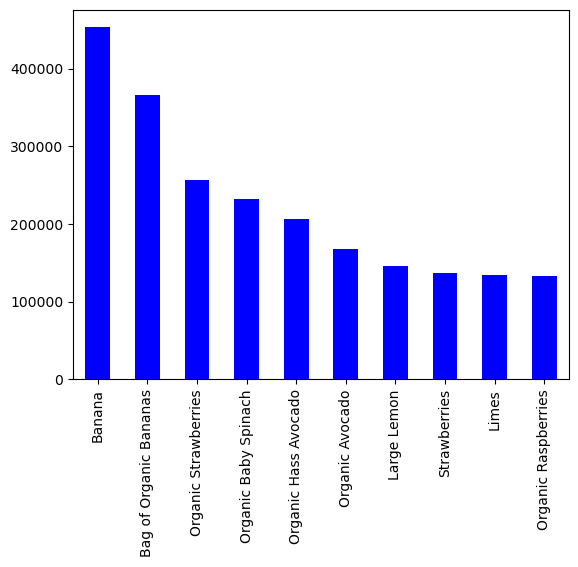

In [59]:
# Create Bar Chart for top 10 produce products
bar_produce_products_top = Produce['product_name'].value_counts().sort_values(ascending=0)[:10].plot.bar(color =['blue'])

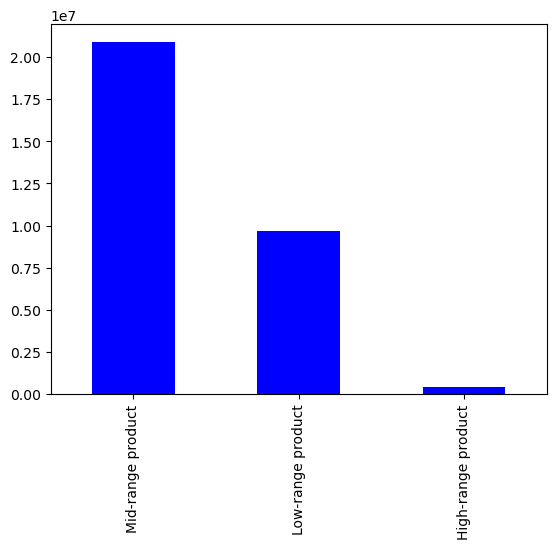

In [60]:
# Create Bar Chart for price range
bar_price_range = active_users['price_range_loc'].value_counts().plot.bar(color =['blue'],)

In [61]:
# Crossstab loyalty flag/departments
departments_loyalty = pd.crosstab(active_users['department_id'], active_users['loyalty_flag'],dropna = False)

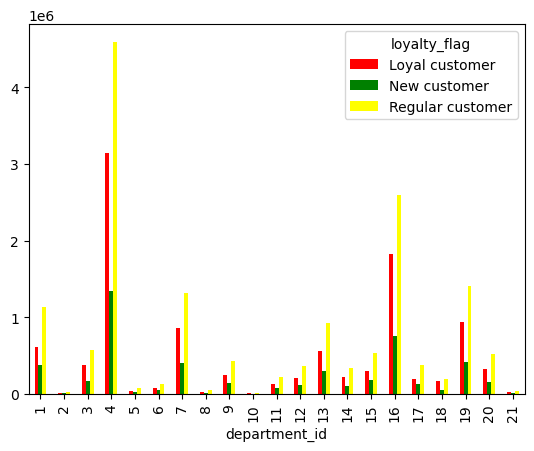

In [62]:
department_loyalty_bar = departments_loyalty.plot.bar(color = ('Red', 'Green', 'Yellow'))

# 10 Exporting Q9

In [37]:
# Exporting active user sample file
active_users.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'active_users.pkl'))

In [38]:
# Export region/spending bar graph
bar_region_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_spending.png'))

In [14]:
# Export profile bar
profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile.png'))

In [16]:
# Export profile pie
profile_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_profile.png'))

In [46]:
# Export profile/income bar
profile_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_income.png'))

In [47]:
# Export earnings pie
earning_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_earnings.png'))

In [48]:
# Export profile pie for low earners
profile_pie_low.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_low_earners_profile.png'))

In [49]:
# Export profile pie for middle class
profile_pie_middle.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_middle_class_profile.png'))

In [50]:
# Export profile pie for upper class
profile_pie_upper.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_upper_class_profile.png'))

In [51]:
# Export profile by region bar
bar_profile_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_region.png'))

In [52]:
# Export departments by region bar
department_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_region.png'))

In [53]:
# Export profile/department bar for low earners
bar_department_profile_low.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_profile_low.png'))

In [54]:
# Export profile/department bar for middle class
bar_department_profile_middle.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_profile_middle.png'))

In [55]:
# Export profile/department bar for upper class
bar_department_profile_upper.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_profile_upper.png'))

In [63]:
# Export department order frequency bar
bar_department_id.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_id.png'))

In [64]:
# Export top 10  produce department products bar
bar_produce_products_top.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_produce_products_top.png'))

In [65]:
# Export price buckets bar
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_range.png'))

In [66]:
# Export order frequecy by department across loyalty buckets bar
department_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_loyalty.png'))